# Predicting Heart Disease
_Author: Ramiro Oliva (Boston)_

---

The goal of this project is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

* 0: represents no heart disease present
* 1: represents heart disease present


## Dataset

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

* **slope_of_peak_exercise_st_segment** (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* **resting_blood_pressure** (type: int): resting blood pressure
* **chest_pain_type** (type: int): chest pain type (4 values)
    * 1=typical angina 
    * 2=atypical angina 
    * 3=non-angina 
    * 4=asymptomatic angina
* **num_major_vessels** (type: int): number of major vessels (0-3) colored by flourosopy
* **fasting_blood_sugar_gt_120_mg_per_dl** (type: binary): fasting blood sugar > 120 mg/dl
* **resting_ekg_results** (type: int): resting electrocardiographic results (values 0,1,2)
* **serum_cholesterol_mg_per_dl** (type: int): serum cholestoral in mg/dl
* **oldpeak_eq_st_depression** (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **sex** (type: binary): 0: female, 1: male
* **age** (type: int): age in years
* **max_heart_rate_achieved** (type: int): maximum heart rate achieved (beats per minute)
* **exercise_induced_angina** (type: binary): exercise-induced chest pain (0: False, 1: True)

Source: UC Irvine Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/statlog+(heart)



## Predict variable (desired target):
**heart_disease_present:** whether patient has or doesn't have heart disease - binary label 0/1. 
* 0 = not present, 
* 1 =  present.

And percentage prediction for heart_disease_present

## Performance metric

Performance is evaluated according to binary log loss. A number closer to zero indicates a better model.

## Loading Libraries

In [2]:
# Modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


import seaborn as sns
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


## Importing the Data

In [3]:
# Loading data
train_df = pd.read_csv('data/train_values.csv', index_col='patient_id')
train_labels_df = pd.read_csv('data/train_labels.csv', index_col='patient_id')
test_df = pd.read_csv('data/test_values.csv', index_col='patient_id')


In [4]:
# First set of observations
train_df.head()

slope_of_peak_exercise_st_segment               thal  \
patient_id                                                         
0z64un                                      1             normal   
ryoo3j                                      2             normal   
yt1s1x                                      1             normal   
l2xjde                                      1  reversible_defect   
oyt4ek                                      3  reversible_defect   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
0z64un                              308                       0.0    1   45   
ryoo3j                              214                       1.6    0   54   
yt1s1x                              304                       0.0    1   77   
l2xjde                              223                       0.0    1   40   
oyt4ek                              270                       4.2    1   59   

            max_heart_rate_achieved  exercise_induced_angina  
patient_id                                                    
0z64un                          170                        0  
ryoo3j                          158                        0  
yt1s1x                          162                        1  
l2xjde                          181                        0  
oyt4ek                          145                        0

In [5]:
# First set of observations
train_labels_df.head()

heart_disease_present
patient_id                       
0z64un                          0
ryoo3j                          0
yt1s1x                          1
l2xjde                          1
oyt4ek                          0

In [6]:
# Renaming Columns
train_df.rename(columns={
    'thal':'results_thallium_stress_test'}, inplace=True)

test_df.rename(columns={
    'thal':'results_thallium_stress_test'}, inplace=True)

In [7]:
# First set of observations after column new name
train_df.head()

slope_of_peak_exercise_st_segment results_thallium_stress_test  \
patient_id                                                                   
0z64un                                      1                       normal   
ryoo3j                                      2                       normal   
yt1s1x                                      1                       normal   
l2xjde                                      1            reversible_defect   
oyt4ek                                      3            reversible_defect   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
0z64un                              308                       0.0    1   45   
ryoo3j                              214                       1.6    0   54   
yt1s1x                              304                       0.0    1   77   
l2xjde                              223                       0.0    1   40   
oyt4ek                              270                       4.2    1   59   

            max_heart_rate_achieved  exercise_induced_angina  
patient_id                                                    
0z64un                          170                        0  
ryoo3j                          158                        0  
yt1s1x                          162                        1  
l2xjde                          181                        0  
oyt4ek                          145                        0

In [8]:
# First set of observations after column new name
test_df.head()

slope_of_peak_exercise_st_segment results_thallium_stress_test  \
patient_id                                                                   
olalu7                                      2            reversible_defect   
z9n6mx                                      1                       normal   
5k4413                                      2            reversible_defect   
mrg7q5                                      1                       normal   
uki4do                                      2                       normal   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
olalu7                         170                1                  0   
z9n6mx                         138                4                  0   
5k4413                         120                4                  0   
mrg7q5                         102                3                  1   
uki4do                         138                4                  1   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
olalu7                                         0                    2   
z9n6mx                                         0                    0   
5k4413                                         0                    2   
mrg7q5                                         0                    0   
uki4do                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
olalu7                              288                       0.2    1   59   
z9n6mx                              183                       1.4    0   35   
5k4413                              177                       2.5    1   43   
mrg7q5                              318                       0.0    0   60   
uki4do                              166                       3.6    1   61   

            max_heart_rate_achieved  exercise_induced_angina  
patient_id                                                    
olalu7                          159                        0  
z9n6mx                          182                        0  
5k4413                          120                        1  
mrg7q5                          160                        0  
uki4do                          125                        1

## Exploratory Data Analysis 

In [9]:
# Field/feature data type
train_df.dtypes

slope_of_peak_exercise_st_segment         int64
results_thallium_stress_test             object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [10]:
# Y data type
train_labels_df.dtypes

heart_disease_present    int64
dtype: object

In [11]:
# Checking for null values in observations
train_df.isnull().sum()

slope_of_peak_exercise_st_segment       0
results_thallium_stress_test            0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [12]:
# Checking for number of unique values
train_df.nunique()

slope_of_peak_exercise_st_segment         3
results_thallium_stress_test              3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64

In [13]:
# Unique values of results_thallium_stress_test
train_df['results_thallium_stress_test'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [14]:
# Unique values of chest_pain_type
train_df['chest_pain_type'].unique()

array([2, 3, 4, 1])

In [15]:
# Unique values of num_major_vessels
train_df['num_major_vessels'].unique()

array([0, 3, 2, 1])

In [16]:
# Describing statistics for train dataframe
train_df.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  
count  180.000000               180.000000               180.000000  
mean    54.811111               149.483333                 0.316667  
std      9.334737                22.063513                 0.466474  
min     29.000000                96.000000                 0.000000  
25%     48.000000               132.000000                 0.000000  
50%     55.000000               152.000000                 0.000000  
75%     62.000000               166.250000                 1.000000  
max     77.000000               202.000000                 1.000000

In [17]:
# Taking a look at the number of observations that have heart disease vs does that don't have heart disease for the training data set
# This data is coming from the training labels
# There are a balanced number of observations for each case
train_labels_df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

[Text(0,0,'No Heart Disease'), Text(0,0,'Heart Disease')]

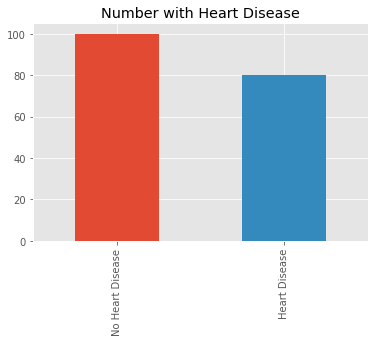

In [18]:
# Visualizing the data above
# There are more 'No Heart Disease' observations
ax = train_labels_df.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease');
ax.set_xticklabels(['No Heart Disease','Heart Disease'])

In [19]:
# Merging into one dataframe for EDA
# Will be using this dataframe to peform EDA
train_values_label = pd.merge(train_df, train_labels_df, left_index=True, right_index=True)
train_values_label.head()

slope_of_peak_exercise_st_segment results_thallium_stress_test  \
patient_id                                                                   
0z64un                                      1                       normal   
ryoo3j                                      2                       normal   
yt1s1x                                      1                       normal   
l2xjde                                      1            reversible_defect   
oyt4ek                                      3            reversible_defect   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
0z64un                              308                       0.0    1   45   
ryoo3j                              214                       1.6    0   54   
yt1s1x                              304                       0.0    1   77   
l2xjde                              223                       0.0    1   40   
oyt4ek                              270                       4.2    1   59   

            max_heart_rate_achieved  exercise_induced_angina  \
patient_id                                                     
0z64un                          170                        0   
ryoo3j                          158                        0   
yt1s1x                          162                        1   
l2xjde                          181                        0   
oyt4ek                          145                        0   

            heart_disease_present  
patient_id                         
0z64un                          0  
ryoo3j                          0  
yt1s1x                          1  
l2xjde                          1  
oyt4ek                          0

In [20]:
# Exploring age
#train_values_label.age.head()

In [21]:
# Checking for max/min values for age
print(train_values_label.age.max())
print(train_values_label.age.min())

77
29


In [22]:
# Function to bin age
def bin_age(age):
    if age >= 20 and age <=40:
        return '20-40'
    elif age >= 41 and age <=50:
        return '41-50'
    elif age >= 51 and age <=60:
        return '51-60'
    elif age >= 60:
        return '61+'

In [23]:
# Creating new feature age_bin
train_values_label['age_bin'] = train_values_label.age.map(bin_age)

In [24]:
# Checking for max/min values for resting_blood_pressure.max
print(train_values_label.resting_blood_pressure.max())
print(train_values_label.resting_blood_pressure.min())

180
94


In [25]:
# Function to bin resting_blood_pressure
def bin_resting_blood_pressure(bl):
    if bl >= 94 and bl <=114:
        return '94-114'
    elif bl >= 115 and bl <=134:
        return '115-134'
    elif bl >= 135 and bl <=154:
        return '135-154'
    elif bl >= 174:
        return '174+'

In [26]:
# Creating new resting_blood_pressure_bin
train_values_label['resting_blood_pressure_bin'] = train_values_label.resting_blood_pressure.map(bin_resting_blood_pressure)

In [27]:
# Checking for max/min values for serum_cholesterol_mg_per_dl
print(train_values_label.serum_cholesterol_mg_per_dl.max())
print(train_values_label.serum_cholesterol_mg_per_dl.min())

564
126


In [28]:
# Function to bin serum_cholesterol_mg_per_dl
def bin_serum_cholesterol(chl):
    if chl >= 126 and chl <=226:
        return '126-226'
    elif chl >= 227 and chl <=326:
        return '227-326'
    elif chl >= 327 and chl <=426:
        return '327-426'
    elif chl >= 427:
        return '427+'

In [29]:
# Creating new resting_blood_pressure_bin
train_values_label['serum_cholesterol_bin'] = train_values_label.serum_cholesterol_mg_per_dl.map(bin_serum_cholesterol)

In [30]:
# Checking for max/min values for max_heart_rate_achieved
print(train_values_label.max_heart_rate_achieved.max())
print(train_values_label.max_heart_rate_achieved.min())

202
96


In [31]:
# Function to bin max_heart_rate_achieved
def bin_max_heart_rate(hr):
    if hr >= 96 and hr <=122:
        return '96-122'
    elif hr >= 127 and hr <=148:
        return '127-148'
    elif hr >= 149 and hr <=174:
        return '149-174'
    elif hr >= 175:
        return '175+'

In [32]:
# Creating new max_heart_rate_achieved_bin
train_values_label['max_heart_rate_bin'] = train_values_label.max_heart_rate_achieved.map(bin_max_heart_rate)

In [33]:
# Age_bin is now part of this dataframe
train_values_label.head()

slope_of_peak_exercise_st_segment results_thallium_stress_test  \
patient_id                                                                   
0z64un                                      1                       normal   
ryoo3j                                      2                       normal   
yt1s1x                                      1                       normal   
l2xjde                                      1            reversible_defect   
oyt4ek                                      3            reversible_defect   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
patient_id                                                                    
0z64un                              308                       0.0    1   45   
ryoo3j                              214                       1.6    0   54   
yt1s1x                              304                       0.0    1   77   
l2xjde                              223                       0.0    1   40   
oyt4ek                              270                       4.2    1   59   

            max_heart_rate_achieved  exercise_induced_angina  \
patient_id                                                     
0z64un                          170                        0   
ryoo3j                          158                        0   
yt1s1x                          162                        1   
l2xjde                          181                        0   
oyt4ek                          145                        0   

            heart_disease_present age_bin resting_blood_pressure_bin  \
patient_id                                                             
0z64un                          0   41-50                    115-134   
ryoo3j                          0   51-60                     94-114   
yt1s1x                          1     61+                    115-134   
l2xjde                          1   20-40                    135-154   
oyt4ek                          0   51-60                       174+   

           serum_cholesterol_bin max_heart_rate_bin  
patient_id                                           
0z64un                   227-326            149-174  
ryoo3j                   126-226            149-174  
yt1s1x                   227-326            149-174  
l2xjde                   126-226               175+  
oyt4ek                   227-326            127-148

In [34]:
# bins = [20, 40, 50, 60, 100]
# bin_names = ['20-40', '40-50', '50-60', '60+']

# age_groups = pd.cut(train_values_label.age, bins,labels=bin_names)
# type(age_groups)
# age_groups = age_groups.sort_values(ascending=True)
# pd.value_counts(age_groups)

In [35]:
# pd.value_counts(age_groups.sort_index(ascending=True)).cumsum()

In [36]:
#train_values_label.values

In [37]:
# df = train_values_label.groupby(pd.cut(train_values_label.age, bins=bins)).values.count()
# df.plot(kind='bar')

In [38]:
#train_values_label.groupby('age').size().plot(kind='barh',color='blue')

In [39]:
# Mean by heart_disease_present
# figsize()
#train_values_label.groupby('age').heart_disease_present.mean().plot(kind='barh',color='blue')
#train_values_label.groupby('age').heart_disease_present.mean()

In [40]:
# Mean by heart_disease_present
train_values_label.groupby('heart_disease_present').mean()

slope_of_peak_exercise_st_segment  \
heart_disease_present                                      
0                                                 1.3600   
1                                                 1.7875   

                       resting_blood_pressure  chest_pain_type  \
heart_disease_present                                            
0                                      130.12           2.8100   
1                                      132.80           3.5875   

                       num_major_vessels  \
heart_disease_present                      
0                                   0.33   
1                                   1.15   

                       fasting_blood_sugar_gt_120_mg_per_dl  \
heart_disease_present                                         
0                                                    0.1600   
1                                                    0.1625   

                       resting_ekg_results  serum_cholesterol_mg_per_dl  \
heart_disease_present                                                     
0                                   0.9200                       245.46   
1                                   1.2125                       253.90   

                       oldpeak_eq_st_depression     sex    age  \
heart_disease_present                                            
0                                       0.62700  0.5500  53.66   
1                                       1.48875  0.8625  56.25   

                       max_heart_rate_achieved  exercise_induced_angina  
heart_disease_present                                                    
0                                       156.87                     0.13  
1                                       140.25                     0.55

In [41]:
# Mean by slope_of_peak_exercise_st_segment
train_values_label.groupby('slope_of_peak_exercise_st_segment').mean()

resting_blood_pressure  chest_pain_type  \
slope_of_peak_exercise_st_segment                                            
1                                              130.580645         3.021505   
2                                              130.653333         3.320000   
3                                              141.083333         3.166667   

                                   num_major_vessels  \
slope_of_peak_exercise_st_segment                      
1                                           0.569892   
2                                           0.893333   
3                                           0.416667   

                                   fasting_blood_sugar_gt_120_mg_per_dl  \
slope_of_peak_exercise_st_segment                                         
1                                                              0.161290   
2                                                              0.133333   
3                                                              0.333333   

                                   resting_ekg_results  \
slope_of_peak_exercise_st_segment                        
1                                             0.903226   
2                                             1.160000   
3                                             1.500000   

                                   serum_cholesterol_mg_per_dl  \
slope_of_peak_exercise_st_segment                                
1                                                   249.354839   
2                                                   251.373333   
3                                                   234.583333   

                                   oldpeak_eq_st_depression       sex  \
slope_of_peak_exercise_st_segment                                       
1                                                  0.421505  0.666667   
2                                                  1.449333  0.680000   
3                                                  2.825000  0.916667   

                                         age  max_heart_rate_achieved  \
slope_of_peak_exercise_st_segment                                       
1                                  53.333333               158.838710   
2                                  56.133333               139.906667   
3                                  58.000000               136.833333   

                                   exercise_induced_angina  \
slope_of_peak_exercise_st_segment                            
1                                                 0.215054   
2                                                 0.413333   
3                                                 0.500000   

                                   heart_disease_present  
slope_of_peak_exercise_st_segment                         
1                                               0.268817  
2                                               0.626667  
3                                               0.666667

In [42]:
# Mean by results_thallium_stress_test
train_values_label.groupby('results_thallium_stress_test').mean()

slope_of_peak_exercise_st_segment  \
results_thallium_stress_test                                      
fixed_defect                                           2.000000   
normal                                                 1.377551   
reversible_defect                                      1.729730   

                              resting_blood_pressure  chest_pain_type  \
results_thallium_stress_test                                            
fixed_defect                              141.375000         3.125000   
normal                                    129.775510         2.897959   
reversible_defect                         132.256757         3.500000   

                              num_major_vessels  \
results_thallium_stress_test                      
fixed_defect                           0.625000   
normal                                 0.530612   
reversible_defect                      0.918919   

                              fasting_blood_sugar_gt_120_mg_per_dl  \
results_thallium_stress_test                                         
fixed_defect                                              0.375000   
normal                                                    0.153061   
reversible_defect                                         0.148649   

                              resting_ekg_results  \
results_thallium_stress_test                        
fixed_defect                             1.250000   
normal                                   1.071429   
reversible_defect                        1.000000   

                              serum_cholesterol_mg_per_dl  \
results_thallium_stress_test                                
fixed_defect                                   227.250000   
normal                                         250.255102   
reversible_defect                              250.202703   

                              oldpeak_eq_st_depression       sex        age  \
results_thallium_stress_test                                                  
fixed_defect                                  1.300000  1.000000  57.875000   
normal                                        0.669388  0.510204  54.387755   
reversible_defect                             1.429730  0.891892  55.040541   

                              max_heart_rate_achieved  \
results_thallium_stress_test                            
fixed_defect                               136.000000   
normal                                     154.938776   
reversible_defect                          143.716216   

                              exercise_induced_angina  heart_disease_present  
results_thallium_stress_test                                                  
fixed_defect                                 0.250000               0.500000  
normal                                       0.153061               0.204082  
reversible_defect                            0.540541               0.756757

In [43]:
# Mean of heart_disease_present groupped by sex
train_values_label.groupby('sex').heart_disease_present.mean()

sex
0    0.196429
1    0.556452
Name: heart_disease_present, dtype: float64

In [44]:
# Mean of heart_disease_present groupped by slope_of_peak_exercise_st_segment
train_values_label.groupby('slope_of_peak_exercise_st_segment').heart_disease_present.mean()

slope_of_peak_exercise_st_segment
1    0.268817
2    0.626667
3    0.666667
Name: heart_disease_present, dtype: float64

In [45]:
# Mean of heart_disease_present groupped by results_thallium_stress_test
train_values_label.groupby('results_thallium_stress_test').heart_disease_present.mean()

results_thallium_stress_test
fixed_defect         0.500000
normal               0.204082
reversible_defect    0.756757
Name: heart_disease_present, dtype: float64

In [46]:
# Mean of heart_disease_present groupped by chest_pain_type
train_values_label.groupby('chest_pain_type').heart_disease_present.mean()

chest_pain_type
1    0.307692
2    0.142857
3    0.228070
4    0.719512
Name: heart_disease_present, dtype: float64

In [47]:
# Mean of heart_disease_present groupped by num_major_vessels
train_values_label.groupby('num_major_vessels').heart_disease_present.mean()

num_major_vessels
0    0.273585
1    0.594595
2    0.739130
3    0.857143
Name: heart_disease_present, dtype: float64

In [48]:
train_values_label.std()

slope_of_peak_exercise_st_segment        0.618838
resting_blood_pressure                  17.010443
chest_pain_type                          0.938454
num_major_vessels                        0.969347
fasting_blood_sugar_gt_120_mg_per_dl     0.368659
resting_ekg_results                      0.998742
serum_cholesterol_mg_per_dl             52.717969
oldpeak_eq_st_depression                 1.121357
sex                                      0.464239
age                                      9.334737
max_heart_rate_achieved                 22.063513
exercise_induced_angina                  0.466474
heart_disease_present                    0.498290
dtype: float64

In [49]:
train_values_label.corr()

slope_of_peak_exercise_st_segment  \
slope_of_peak_exercise_st_segment                              1.000000   
resting_blood_pressure                                         0.098287   
chest_pain_type                                                0.121207   
num_major_vessels                                              0.076832   
fasting_blood_sugar_gt_120_mg_per_dl                           0.050199   
resting_ekg_results                                            0.172191   
serum_cholesterol_mg_per_dl                                   -0.032348   
oldpeak_eq_st_depression                                       0.615948   
sex                                                            0.093340   
age                                                            0.169918   
max_heart_rate_achieved                                       -0.418102   
exercise_induced_angina                                        0.225459   
heart_disease_present                                          0.344224   

                                      resting_blood_pressure  chest_pain_type  \
slope_of_peak_exercise_st_segment                   0.098287         0.121207   
resting_blood_pressure                              1.000000        -0.029296   
chest_pain_type                                    -0.029296         1.000000   
num_major_vessels                                   0.042388         0.249061   
fasting_blood_sugar_gt_120_mg_per_dl                0.166570        -0.088992   
resting_ekg_results                                 0.078986         0.033379   
serum_cholesterol_mg_per_dl                         0.144881         0.061213   
oldpeak_eq_st_depression                            0.219026         0.080799   
sex                                                -0.055589         0.086057   
age                                                 0.284402         0.085001   
max_heart_rate_achieved                            -0.017521        -0.301792   
exercise_induced_angina                             0.123397         0.346266   
heart_disease_present                               0.078506         0.412829   

                                      num_major_vessels  \
slope_of_peak_exercise_st_segment              0.076832   
resting_blood_pressure                         0.042388   
chest_pain_type                                0.249061   
num_major_vessels                              1.000000   
fasting_blood_sugar_gt_120_mg_per_dl           0.169792   
resting_ekg_results                            0.096656   
serum_cholesterol_mg_per_dl                    0.098348   
oldpeak_eq_st_depression                       0.214062   
sex                                            0.073107   
age                                            0.347355   
max_heart_rate_achieved                       -0.275687   
exercise_induced_angina                        0.153407   
heart_disease_present                          0.421519   

                                      fasting_blood_sugar_gt_120_mg_per_dl  \
slope_of_peak_exercise_st_segment                                 0.050199   
resting_blood_pressure                                            0.166570   
chest_pain_type                                                  -0.088992   
num_major_vessels                                                 0.169792   
fasting_blood_sugar_gt_120_mg_per_dl                              1.000000   
resting_ekg_results                                               0.053864   
serum_cholesterol_mg_per_dl                                       0.027560   
oldpeak_eq_st_depression                                         -0.039055   
sex                                                               0.066010   
age                                                               0.176101   
max_heart_rate_achieved                                           0.058369   
exercise_induced_angina                                          -0.005956   
heart_disea

In [50]:
# Observations

## Visualizations

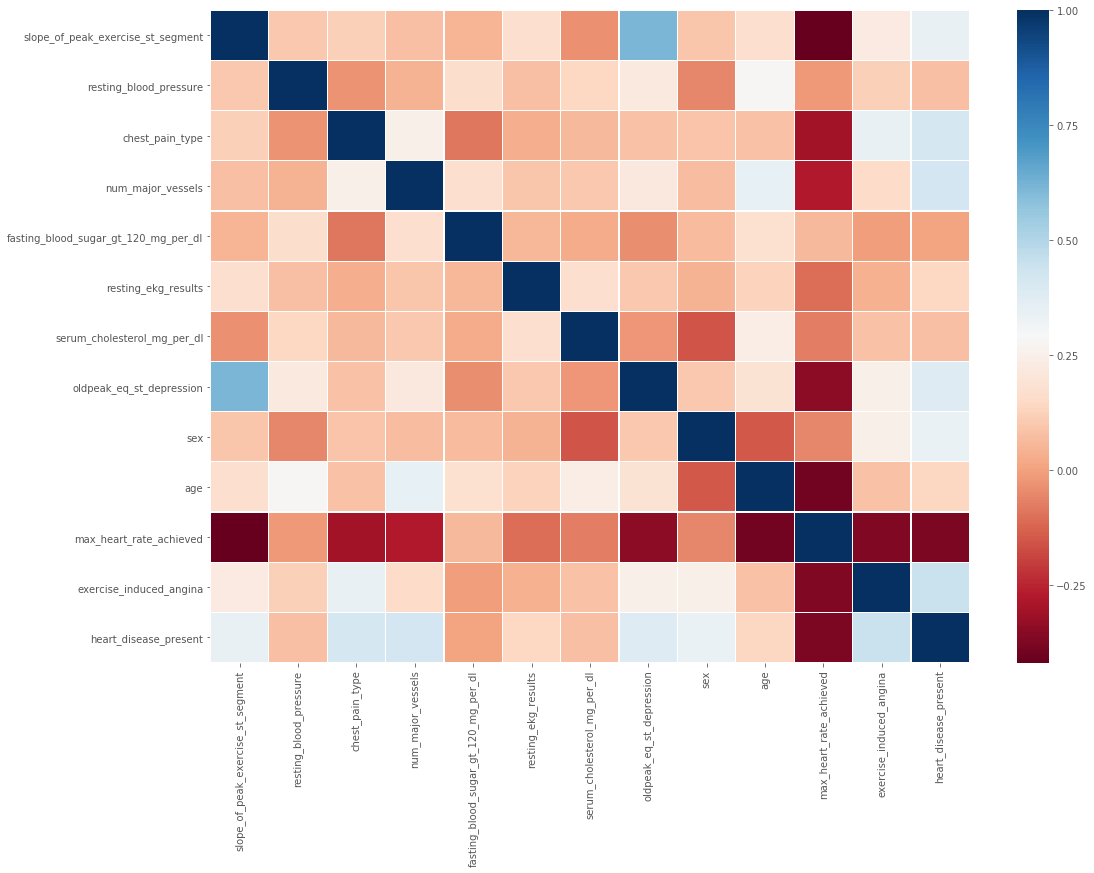

In [141]:
# Visualizing Correlations
plt.subplots(figsize=(17,12))
sns.heatmap(train_values_label.corr(), cmap='RdBu', linewidths=0.2)

# The color of each sale relates the value of correlation of my features
# This heatmap allows us to see the nature of the data quickly 

[Text(0,0,'No Heart Disease'), Text(0,0,'Heart Disease')]

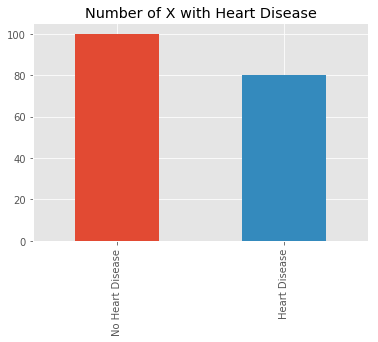

In [53]:
# Visualizing the counts of training labels (same as above)
ax = train_labels_df.heart_disease_present.value_counts().plot.bar(title='Number of X with Heart Disease');
ax.set_xticklabels(['No Heart Disease','Heart Disease'])

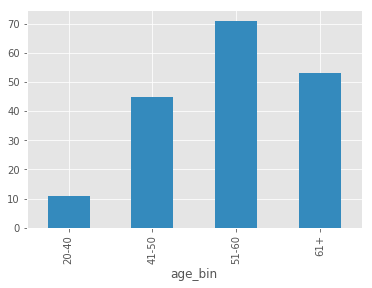

In [54]:
# Displaying age by bins
train_values_label.groupby('age_bin').size().plot(kind='bar',color='#348abd')

In [140]:
# Same as above but normalized
out = pd.cut(train_values_label.age_bin, bins=bins, include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="#348abd", figsize=(6,4))
plt.ylabel("pct")
plt.show()

NameError: name 'bins' is not defined

[Text(0,0,'Female'), Text(0,0,'Male')]

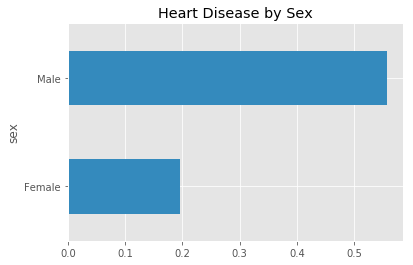

In [61]:
# Plot of Mean of heart_disease_present groupped by sex
ax = train_values_label.groupby('sex').heart_disease_present.mean().plot(kind='barh',color='#348abd',title='Heart Disease by Sex')
ax.set_yticklabels(['Female','Male'])

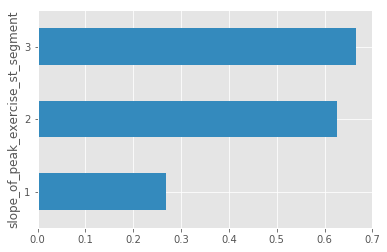

In [62]:
# Plot of Mean of heart_disease_present groupped by slope_of_peak_exercise_st_segment
train_values_label.groupby('slope_of_peak_exercise_st_segment').heart_disease_present.mean().plot(kind='barh',color='#348abd')

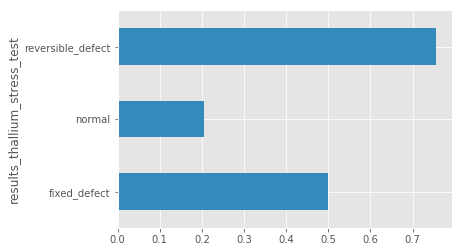

In [63]:
# Plot of Mean of heart_disease_present groupped by results_thallium_stress_test
train_values_label.groupby('results_thallium_stress_test').heart_disease_present.mean().plot(kind='barh',color='#348abd')

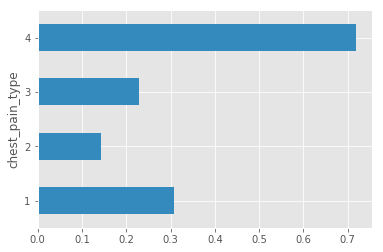

In [64]:
# Plot of Mean of heart_disease_present groupped by chest_pain_type
train_values_label.groupby('chest_pain_type').heart_disease_present.mean().plot(kind='barh',color='#348abd')

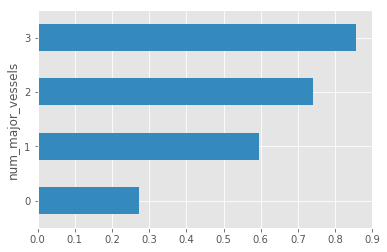

In [65]:
# Plot of Mean of heart_disease_present groupped by num_major_vessels
train_values_label.groupby('num_major_vessels').heart_disease_present.mean().plot(kind='barh',color='#348abd')

Text(0,0.5,'Frequency')

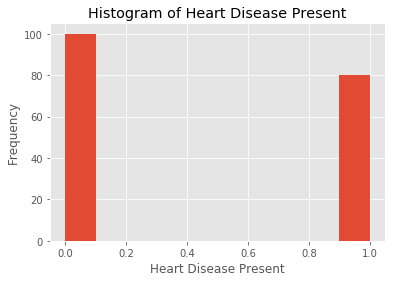

In [66]:
# Heart Disease Present Histogram from Labels (no % or predictions)
# As exptected there is no normal distribution
train_values_label.heart_disease_present.hist()
plt.title('Histogram of Heart Disease Present')
plt.xlabel('Heart Disease Present')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

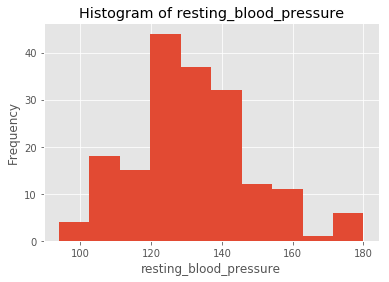

In [67]:
# Resting Blood Pressure Histogram
train_values_label.resting_blood_pressure.hist()
plt.title('Histogram of resting_blood_pressure')
plt.xlabel('resting_blood_pressure')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

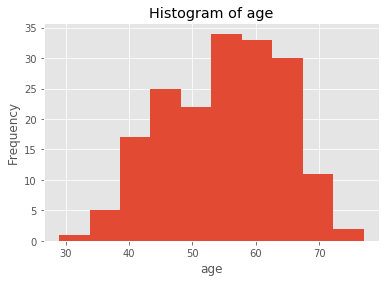

In [68]:
# Age Histogram
train_values_label.age.hist()
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

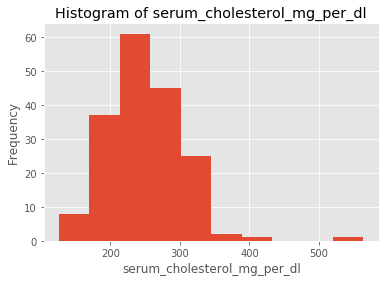

In [69]:
# Serum Cholesterol Histogram
train_values_label.serum_cholesterol_mg_per_dl.hist()
plt.title('Histogram of serum_cholesterol_mg_per_dl')
plt.xlabel('serum_cholesterol_mg_per_dl')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

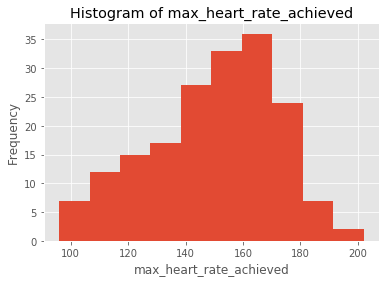

In [70]:
# Max Heart Rate Histogram
train_values_label.max_heart_rate_achieved.hist()
plt.title('Histogram of max_heart_rate_achieved')
plt.xlabel('max_heart_rate_achieved')
plt.ylabel('Frequency')

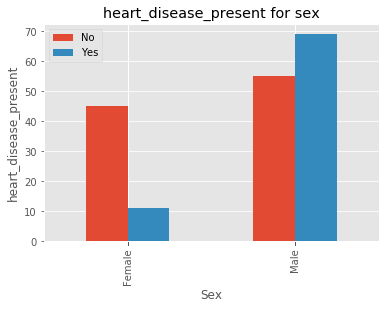

In [71]:
# Heart Disease by Sex
%matplotlib inline
pd.crosstab(train_values_label.sex,train_values_label.heart_disease_present).plot(kind='bar')
plt.title('heart_disease_present for sex')
plt.xlabel('Sex')
plt.ylabel('heart_disease_present')
plt.xticks(train_values_label.sex, ['Male', 'Female'], rotation='vertical')
plt.legend(('No', 'Yes'))
plt.savefig('heart_disease_present')

Text(0,0.5,'heart_disease_present')

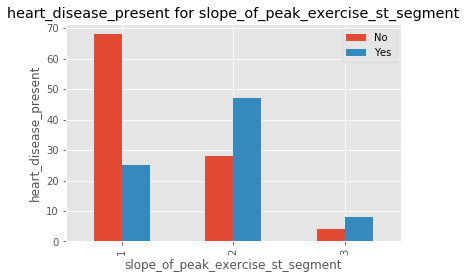

In [72]:
# Heart Disease by Slope Of Peak Exercise 
%matplotlib inline
pd.crosstab(train_values_label.slope_of_peak_exercise_st_segment,train_values_label.heart_disease_present).plot(kind='bar')
plt.title('heart_disease_present for slope_of_peak_exercise_st_segment')
plt.xlabel('slope_of_peak_exercise_st_segment')
plt.legend(('No', 'Yes'))
plt.ylabel('heart_disease_present')

Text(0,0.5,'heart_disease_present')

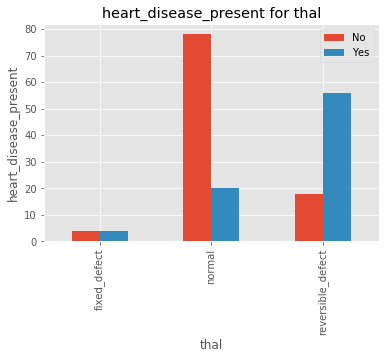

In [73]:
# Heart Rate by Thallium stress Test
%matplotlib inline
pd.crosstab(train_values_label.results_thallium_stress_test,train_values_label.heart_disease_present).plot(kind='bar')
plt.title('heart_disease_present for thal')
plt.xlabel('thal')
plt.legend(('No', 'Yes'))
plt.ylabel('heart_disease_present')

In [76]:
# Features selected for training
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure']
train_values_subset = train_df[selected_features]

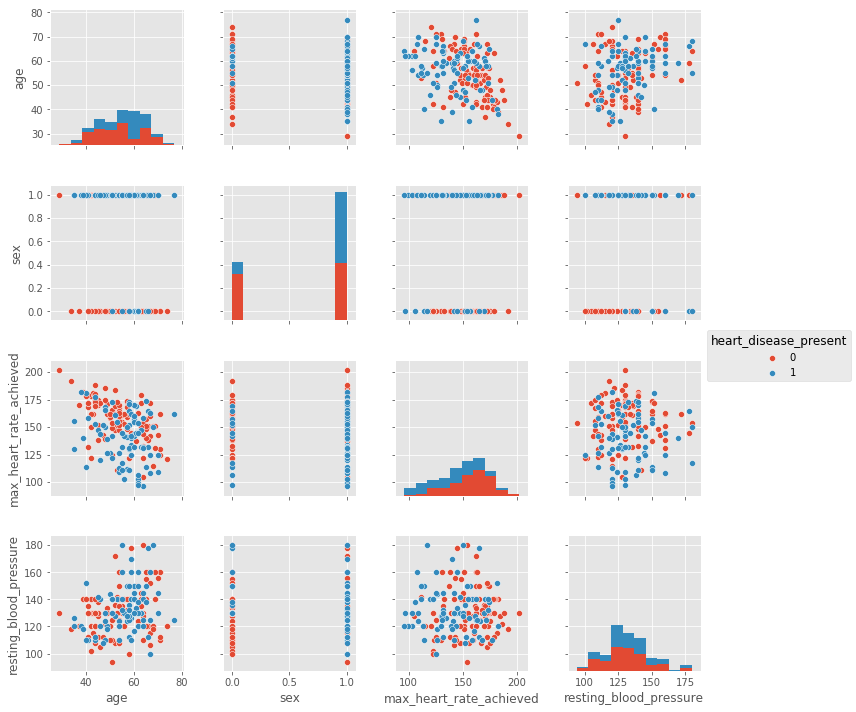

In [79]:
# This graph illustrates the relationship between each one of the features vs heart_disease_prent 
# Where 0 indicates no heart disease present, and a 1 indicates the presence of heart disease.
sns.pairplot(train_df.join(train_labels_df), 
             hue='heart_disease_present', 
             vars=selected_features);

## Observations from EDA and Visualizations

* There are more observations with no 
heart disease than with heart disease.

* People in their 50's seem be affected 
by hear disease than other ages in the 
dataset.

* Males seem to have more heart disease 
than females.

* Higher  resting blood pressure seems to
be correlated with more cases of heart disease.

* Chest Pain Type 4 (asymptomatic angina) seems
correlated with heart disease.

* Thalium test with results of 'reversible defect'
seems correlated with heart disease.

* More number of major vessels colored by flourosopy
seems correlated with heart disease.

## Creating Dummy Variables

In [80]:
# Creating dummy features
thal_dummies = pd.get_dummies(train_df["results_thallium_stress_test"],prefix="thal") 
chest_pain_dummies = pd.get_dummies(train_df["chest_pain_type"],prefix="chest_pain")
slope_peak_dummies = pd.get_dummies(train_df["slope_of_peak_exercise_st_segment"],prefix="slope_peak")
vessels_num_dummies = pd.get_dummies(train_df["num_major_vessels"],prefix="vessels_num")
rest_ekg_dummies = pd.get_dummies(train_df["resting_ekg_results"],prefix="rest_ekg")

In [81]:
train_df = train_df.join(thal_dummies)

In [82]:
train_df = train_df.join(chest_pain_dummies)

In [83]:
train_df = train_df.join(slope_peak_dummies)

In [84]:
train_df = train_df.join(vessels_num_dummies)

In [85]:
train_df = train_df.join(rest_ekg_dummies)

In [86]:
train_df.head()

slope_of_peak_exercise_st_segment results_thallium_stress_test  \
patient_id                                                                   
0z64un                                      1                       normal   
ryoo3j                                      2                       normal   
yt1s1x                                      1                       normal   
l2xjde                                      1            reversible_defect   
oyt4ek                                      3            reversible_defect   

            resting_blood_pressure  chest_pain_type  num_major_vessels  \
patient_id                                                               
0z64un                         128                2                  0   
ryoo3j                         110                3                  0   
yt1s1x                         125                4                  3   
l2xjde                         152                4                  0   
oyt4ek                         178                1                  0   

            fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
patient_id                                                              
0z64un                                         0                    2   
ryoo3j                                         0                    0   
yt1s1x                                         0                    2   
l2xjde                                         0                    0   
oyt4ek                                         0                    2   

            serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  \
patient_id                                                               
0z64un                              308                       0.0    1   
ryoo3j                              214                       1.6    0   
yt1s1x                              304                       0.0    1   
l2xjde                              223                       0.0    1   
oyt4ek                              270                       4.2    1   

               ...      slope_peak_1  slope_peak_2  slope_peak_3  \
patient_id     ...                                                 
0z64un         ...                 1             0             0   
ryoo3j         ...                 0             1             0   
yt1s1x         ...                 1             0             0   
l2xjde         ...                 1             0             0   
oyt4ek         ...                 0             0             1   

            vessels_num_0  vessels_num_1  vessels_num_2  vessels_num_3  \
patient_id                                                               
0z64un                  1              0              0              0   
ryoo3j                  1              0              0              0   
yt1s1x                  0              0              0              1   
l2xjde                  1              0              0              0   
oyt4ek                  1              0              0              0   

            rest_ekg_0  rest_ekg_1  rest_ekg_2  
patient_id                                      
0z64un               0           0           1  
ryoo3j               1           0           0  
yt1s1x               0           0           1  
l2xjde               1           0           0  
oyt4ek               0           0           1  

[5 rows x 30 columns]

In [87]:
# New dummy features
train_df.columns

Index(['slope_of_peak_exercise_st_segment', 'results_thallium_stress_test',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'slope_peak_1', 'slope_peak_2', 'slope_peak_3', 'vessels_num_0',
       'vessels_num_1', 'vessels_num_2', 'vessels_num_3', 'rest_ekg_0',
       'rest_ekg_1', 'rest_ekg_2'],
      dtype='object')

## Creating Null Model

In [89]:
null_model = train_labels_df.heart_disease_present.mean()
null_model

0.4444444444444444

In [91]:
null_model_df = pd.DataFrame(index=train_labels_df.index)
null_model_df['heart_disease_present_mean'] = train_labels_df.heart_disease_present.mean()
null_model_df.head()

heart_disease_present_mean
patient_id                            
0z64un                        0.444444
ryoo3j                        0.444444
yt1s1x                        0.444444
l2xjde                        0.444444
oyt4ek                        0.444444

## Logistic Regression

In [144]:
# Selected Features
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'serum_cholesterol_mg_per_dl',
                     'resting_blood_pressure',
                     'thal_reversible_defect',
                     'vessels_num_1', 
                     'vessels_num_2', 
                     'vessels_num_3',
                     'chest_pain_1',
                     'chest_pain_4',
                     'rest_ekg_0',
                     'rest_ekg_1', 
                     'rest_ekg_2']


In [145]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


X = train_df[selected_features]
y = train_labels_df.heart_disease_present

# Fitting/training the model
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
# returning the predicted labels
pred = logreg.predict(X)
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0])

In [147]:
# The first column is the probability of heart_disease_present=0 for a given row, and the second column is the probability of heart_disease_present=1.
logreg.predict_proba(X)[0:10]

array([[0.81840673, 0.18159327],
       [0.9766944 , 0.0233056 ],
       [0.38565178, 0.61434822],
       [0.39042265, 0.60957735],
       [0.30063898, 0.69936102],
       [0.87757481, 0.12242519],
       [0.1560052 , 0.8439948 ],
       [0.1076132 , 0.8923868 ],
       [0.07726817, 0.92273183],
       [0.97133874, 0.02866126]])

In [148]:
# Storing the predicted probabilities of class 1.
train_df['heart_disease_present_prob'] = logreg.predict_proba(X)[:, 1]

In [149]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.86


## Train-test-split

In [192]:
# Selected Features
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'serum_cholesterol_mg_per_dl',
                     'resting_blood_pressure',
                     'thal_reversible_defect',
                     'vessels_num_1', 
                     'vessels_num_2', 
                     'vessels_num_3',
                     'chest_pain_1',
                     'chest_pain_4']
X = train_df[selected_features]

In [193]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [194]:
# instatiation
LogReg = LogisticRegression()

# Fitting
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
# Class prediction
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [196]:
# Probability of Heart Disease with Train-test split
LogReg.predict_proba(X_test)[0:10]

array([[0.62181473, 0.37818527],
       [0.86821704, 0.13178296],
       [0.78255187, 0.21744813],
       [0.74576595, 0.25423405],
       [0.32469821, 0.67530179],
       [0.15363161, 0.84636839],
       [0.13324334, 0.86675666],
       [0.63497323, 0.36502677],
       [0.76035724, 0.23964276],
       [0.86557168, 0.13442832]])

In [197]:
# Weight of features
LogReg.coef_[0]

array([-0.02119349,  1.1807798 , -0.0352076 ,  0.00641158,  0.01511899,
        1.15197405,  0.80083762,  0.96842545,  1.02378924, -0.38980518,
        1.63342252])

In [198]:
# Evaluating Model
# Computing confusion matrix to evaluate the accuracy of the classification
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[24,  3],
       [ 8, 19]])

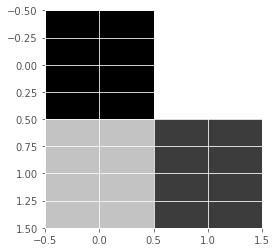

In [199]:
# Visualizing the confusion matrix
plt.imshow(confusion_matrix, cmap='binary', interpolation='None')
plt.show()

In [200]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# precision is the ability of the classifier to not label a sample as positive if it is negative.
# recall the ability of the classifier to find all the positive samples.
# f-score closer to one is a better model and f1-score closer to 0 is not.

             precision    recall  f1-score   support

          0       0.75      0.89      0.81        27
          1       0.86      0.70      0.78        27

avg / total       0.81      0.80      0.79        54



In [201]:
# Another report
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted   0   1  All
True                  
0          24   3   27
1           8  19   27
All        32  22   54

In [233]:
# Performance is evaluated according to binary log loss
# https://en.wikipedia.org/wiki/Cross_entropy

from sklearn.metrics import log_loss

in_sample_preds = LogReg.predict_proba(X)
log_loss(train_labels_df.heart_disease_present, in_sample_preds)

# A number closer to zero indicates better performance

0.39430713360284353

In [159]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


## Model Training with Pipelines

In [203]:
# Selected Features
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'serum_cholesterol_mg_per_dl',
                     'resting_blood_pressure',
                     'thal_reversible_defect',
                     'vessels_num_1', 
                     'vessels_num_2', 
                     'vessels_num_3',
                     'chest_pain_1',
                     'chest_pain_4']
X = train_df[selected_features]

In [204]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [205]:
# Passing steps to the pipe
pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [206]:
# Trying different parameters to prevent overfitting
param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 
              'logistic__penalty': ['l1', 'l2']}
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=3)

In [207]:
# Fitting the model
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [208]:
# Best Parameters
gs.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [209]:
# Log loss with Pipelines
y_pred_prob = gs.predict_proba(X)
log_loss(train_labels_df.heart_disease_present, y_pred_prob)

0.3863531608086605

In [210]:
# Predictions
predictions = gs.predict_proba(X_test)[:, 1]
predictions

array([0.86901815, 0.08178661, 0.17669024, 0.18834582, 0.82815259,
       0.94252174, 0.98989667, 0.59160331, 0.23222992, 0.07875111,
       0.06991636, 0.99854661, 0.3793167 , 0.01000598, 0.79400246,
       0.0147414 , 0.9078585 , 0.08888369, 0.08669464, 0.86647841,
       0.59189078, 0.05176645, 0.85223647, 0.98915719, 0.99755367,
       0.38095699, 0.05668862, 0.01174592, 0.39834135, 0.0651103 ,
       0.94431459, 0.27269462, 0.97792118, 0.9576703 , 0.97960313,
       0.00640029, 0.37036498, 0.49356263, 0.00940555, 0.93186647,
       0.72673453, 0.18223113, 0.11540786, 0.08197717, 0.96834501,
       0.93458083, 0.89428169, 0.14070596, 0.82092245, 0.11851167,
       0.200962  , 0.29842845, 0.0229561 , 0.99509349])

In [211]:
print('Accuracy of logistic regression classifier with pipelines on test set: {:.2f}'.format(gs.score(X_test, y_test)))

Accuracy of logistic regression classifier with pipelines on test set: 0.80


## Naive Bayes Classification

In [212]:
# import of naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

In [213]:
# Instantiate the classifier
gnb = GaussianNB()

In [214]:
# Train classifier
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [215]:
# Predictions
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [216]:
# Probability of Heart Disease with Naive Bayes
y_pred_prob = gnb.predict_proba(X_test)
y_pred_prob

array([[0.00000000e+00, 1.00000000e+00],
       [9.99125943e-01, 8.74056515e-04],
       [9.99932215e-01, 6.77853467e-05],
       [9.99379353e-01, 6.20646730e-04],
       [4.66641872e-01, 5.33358128e-01],
       [2.48736234e-02, 9.75126377e-01],
       [0.00000000e+00, 1.00000000e+00],
       [4.59026194e-01, 5.40973806e-01],
       [9.99732813e-01, 2.67186954e-04],
       [1.00000000e+00, 2.88815538e-12],
       [9.99989120e-01, 1.08797552e-05],
       [0.00000000e+00, 1.00000000e+00],
       [9.95622868e-01, 4.37713207e-03],
       [9.99998130e-01, 1.87020863e-06],
       [3.96713271e-01, 6.03286729e-01],
       [1.00000000e+00, 1.43981821e-14],
       [2.08345440e-02, 9.79165456e-01],
       [9.99920689e-01, 7.93110834e-05],
       [9.99800806e-01, 1.99194069e-04],
       [9.57826135e-01, 4.21738648e-02],
       [9.41345882e-01, 5.86541175e-02],
       [9.96748023e-01, 3.25197657e-03],
       [2.55438069e-01, 7.44561931e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [232]:
# Log loss with Naive Bayes
y_pred_prob = gnb.predict_proba(X)
log_loss(train_labels_df.heart_disease_present, y_pred_prob)

1.806413615914958

In [218]:
# Confusion Matrix and classification report
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# precision is the ability of the classifier to not label a sample as positive if it is negative.
# recall the ability of the classifier to find all the positive samples.
# f-score closer to one is a better model and f1-score closer to 0 is not.

             precision    recall  f1-score   support

          0       0.68      0.85      0.75        27
          1       0.80      0.59      0.68        27

avg / total       0.74      0.72      0.72        54

[[23  4]
 [11 16]]


In [219]:
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.72


## ROC Curve

The receiver operating characteristic (ROC) curve is a common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [222]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

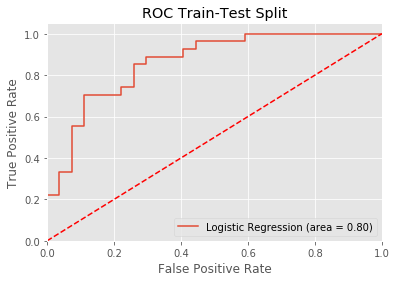

In [226]:
# Roc curve for train-test split
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train-Test Split')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

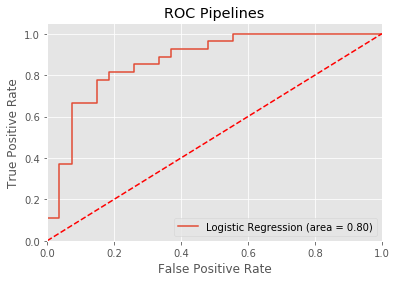

In [227]:
# ROC curve for logistic regresation with pipelines
logit_roc_auc = roc_auc_score(y_test, gs.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gs.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Pipelines')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

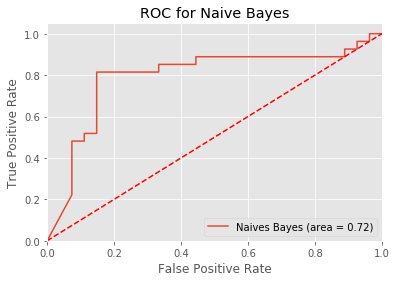

In [229]:
# ROC curve for Naives Bayes 
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naives Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Conclusions

I decided to try to predict hear disease because I thought it would be something that matter. I realized how many people die of heart disease
and how important it would be to for a hospital to be able to predict the probability of heart disease of a patient. It could save a life.

I learned so much developing this project, I learned about classification templates for models such as logistic regression and naive bayes. I also learned about pipelines that can be used to try to avoid memorization by the model, although I still have to explore more about them.
I also learned about log loss, which is one of the main performance metrics use in kaggle competition. 

Most importantly, I learned the importance of EDA. One of the issues I had during the project was that my log loss was really high but it was not until
performing extensive EDA that I realized that I had to create dummy variables for some of my features so that I could include them in my model. Once this was done, my model performance improved dramatically. Thanks EDA!

Finally, in terms of heart disease prevention:
* It seems like men have a higher probability of having heart disease.
* It seems like people in their 50-60 have a higher probability of heart disease.
* It looks like higher blood pressure is an indicator of probability of heart disease.
* It looks like a higher number of blood vessels colored by fluoroscopy increases the probability of heart disease.
* It looks like chest pain of type 4 has an impact in the probability of heart disease.

### Next Steps
I dediced to use different templates for my model in order to compare performance and to learn more about each other. However, in production I would like to be able to identify the right template so I can create an accurate and efficient model. I would also like to know what happens to people 60+ years old, the assumption is that maybe they pass away and that is why there is drop in cases of heart disease but in the end I would have to do more research. 

Finally, I have only scratched the top of the field of data science and I am hooked. I want to become really good at it and I know I need more projectst to solve so I will be in the look for new projects and also opportunities to continue to develop my data science skills specially EDA and visualization.
